In [1]:
import sys
import math
import numpy as np #v 1.23.3
import networkx as nx
import matplotlib.cm as cm
import matplotlib
import argparse
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from networkx.algorithms import community
import community
from community import community_louvain #conda install python-louvain
from PIL import Image
import os
import scipy
from numpy import roots 
%matplotlib notebook
import ast
import seaborn as sns

In [19]:
print(nx.__version__)

2.8.7


In [2]:
#directory="/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/03-05-23_4/"
directory="/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/01-05-23_2/"

In [3]:
df1 = pd.read_csv (r'/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/01-05-23_2/ALL_ANALYSIS.csv')

df_G_width = pd.read_csv (directory+'_STD_GRAPH_ANALYSIS_WIDTH_SEP.csv')

df_G_width['edge_num']=df1['total_edges']
#df_G_width = pd.read_csv (directory+'/GRAPH_ANALYSIS_WIDTH_2.csv')

#df_G = pd.read_csv (r'/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/18-04-23_1_COMBINED/GRAPH_ANALYSIS_BASE.csv')
#df_G_short = pd.read_csv (r'/media/ll16598/One Touch/CT_ANALYSIS/FINAL/shortened_GRAPH_ANALYSIS_BASE.csv')
# df_G_short_width = pd.read_csv (r'/media/ll16598/One Touch/CT_ANALYSIS/FINAL/shortened_GRAPH_ANALYSIS_WIDTH.csv')
#df_G_width_o = pd.read_csv (r'/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/04-04-23_1/GRAPH_ANALYSIS_WIDTH_O.csv')


In [4]:
#abm_df=pd.read_csv('/media/ll16598/One Touch/CT_ANALYSIS/FINAL/GAUDI_ABM.csv')
sim_df=pd.read_csv(directory+'SIMULATIONS/SIMULATION_ANALYSIS_BASE_TIME.csv')
#sim_df_w=pd.read_csv('/media/ll16598/One Touch/CT_ANALYSIS/FINAL/SIMULATIONS/SIMULATION_ANALYSIS_WIDTH_TIME.csv')
df_V = pd.read_csv ('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/VOL_ANALYSIS.csv')

In [5]:
df1 = pd.read_csv (r'/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/01-05-23_2/ALL_ANALYSIS.csv')


In [6]:
import re
def split_and_convert(val):
    val = re.sub(r'[^\d\.]+', ' ', val)
    return [float(v) for v in val.split()]

In [7]:
dfs = []
df=df_G_width
for i, x in enumerate(df['chamber_ids']):
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'chamber_ids': x})
    dfs.append(new_df)
chamber_ids = pd.concat(dfs)

dfs = []
df=df_G_width
for i, x in enumerate(df['chamber_chamber_ids']):
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'chamber_chamber_ids': x})
    dfs.append(new_df)
chamber_chamber_ids = pd.concat(dfs)

dfs=[]
for i, x in enumerate(df['nech_path_ids']):
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'nech_path_ids': x})
    dfs.append(new_df)
nech_path_ids = pd.concat(dfs)

In [8]:
dfs = []
df=df_V
for i, x in enumerate(df['cham_vol_list']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'cham_vol_list': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result_ch_bet = pd.concat(dfs)
cham_vol_list = result_ch_bet.reset_index(drop=True)
result_ch_bet.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/PHYSICAL_ANALYSIS/CHAM_VOL.csv', index=False)

In [9]:
dfs = []
df=df1
for i, x in enumerate(df['nest_entrance_dims_list']):
    k=split_and_convert(x)
    for x in k:
        new_df = pd.DataFrame({'nest_entrance_dims_list': x,
                               'treatment': [df['treatment'][i]],
                               'name': [df['name'][i]],
                               'day': [df['day'][i]],
                               'time': [df['time'][i]],
                               'week': [df['week'][i]],
                               'subset': [df['subset'][i]],
                            #   'edge_num': [df['edge_num'][i]],
                               'colony': [df['colony'][i]]})
    dfs.append(new_df)
result_ch_bet = pd.concat(dfs)
nest_entrance_dims_list = result_ch_bet.reset_index(drop=True)
result_ch_bet.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/PHYSICAL_ANALYSIS/ENTRANCE_DIMS.csv', index=False)

In [10]:
dfs = []
df=df_G_width
for i, x in enumerate(df['chamber_ids']):
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'chamber_ids': x})
    dfs.append(new_df)
chamber_ids = pd.concat(dfs)
dfs = []
df=df_G_width
for i, x in enumerate(df['cham_flow_centrality_list']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'cham_flow_centrality_list': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'edge_num': [df['edge_num'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result_ch_bet = pd.concat(dfs)
result_ch_bet['chamber_id']=chamber_ids['chamber_ids']
cham_flow_centrality_list = result_ch_bet.reset_index(drop=True)

#result_ch_bet.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/CENTRALITY_ANALYSIS/CHAM_BETWEEN.csv', index=False)
result_ch_bet.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/CENTRALITY_ANALYSIS/CHAM_BC_NE_ALL.csv', index=False)

In [11]:
dfs=[]
df=df_G_width
for i, x in enumerate(df['chamber_degree']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'chamber_degree': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'edge_num': [df['edge_num'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result_ch_close = pd.concat(dfs)
result_ch_close['chamber_id']=chamber_ids['chamber_ids']
chamber_closeness_spatial = result_ch_close.reset_index(drop=True)


result_ch_close.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/CENTRALITY_ANALYSIS/DEGREE_NO_W.csv', index=False)
#result_ch_close.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/CENTRALITY_ANALYSIS/CHAM_CLOSE_CEN2.csv', index=False)


In [12]:
dfs=[]
df=df_G_width
for i, x in enumerate(df['chamber_closeness_spatial']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'chamber_closeness_spatial': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'edge_num': [df['edge_num'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result_ch_close = pd.concat(dfs)
result_ch_close['chamber_id']=chamber_ids['chamber_ids']
chamber_closeness_spatial = result_ch_close.reset_index(drop=True)


result_ch_close.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/CENTRALITY_ANALYSIS/CHAM_CLOSE_CEN.csv', index=False)
#result_ch_close.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/CENTRALITY_ANALYSIS/CHAM_CLOSE_CEN2.csv', index=False)


In [13]:
df['chamber_chamber_degs']

0                                                    []
1                                                    []
2                                                    []
3                                                    []
4                                                    []
                            ...                        
95                                                   []
96                          [0.25, 0.25, 0.5, 0.5, 0.0]
97    [0.3333333333333333, 0.16666666666666666, 0.33...
98                       [0.2, 0.4, 0.4, 0.4, 0.4, 0.2]
99    [0.3333333333333333, 0.16666666666666666, 0.33...
Name: chamber_chamber_degs, Length: 100, dtype: object

In [14]:
dfs = []
df=df_G_width
for i, x in enumerate(df['chamber_chamber_degs']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'chamber_chamber_degs': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                        #   'edge_num': [df['edge_num'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result_de_cen = pd.concat(dfs)
result_de_cen['chamber_id']=chamber_chamber_ids['chamber_chamber_ids']
chamber_degree_centrality = result_de_cen.reset_index(drop=True)
#result_de_cen.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/CENTRALITY_ANALYSIS/CHAM_DEG_CEN2.csv', index=False)
result_de_cen.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/CENTRALITY_ANALYSIS/CHAM_DEG_CEN.csv', index=False)

In [15]:
df=df_G_width

dfs=[]
for i, x in enumerate(df['nech_all_sptl_paths_list']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'nech_all_sptl_paths_list': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)

nech_all_sptl_paths_list = result.reset_index(drop=True)
result['path_id']=nech_path_ids['nech_path_ids']

result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/PATH_LENGTH_ANALYSIS/NE_CH_SPATIAL.csv', index=False)

dfs=[]
for i, x in enumerate(df['chch_all_sptl_paths_list']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'chch_all_sptl_paths_list': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
#result['path_id']=ch_path_ids['ch_path_ids']

chch_all_sptl_paths_list = result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/PATH_LENGTH_ANALYSIS/CH_CH_SPATIAL.csv', index=False)


In [43]:
dfs=[]
for i, x in enumerate(df['ch_path_ids']):
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'ch_path_ids': x})
    dfs.append(new_df)
ch_path_ids = pd.concat(dfs)

In [44]:
dfs=[]
for i, x in enumerate(df['nech_path_ids']):
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'nech_path_ids': x})
    dfs.append(new_df)
nech_path_ids = pd.concat(dfs)
#nech_path_ids['nech_path_ids']=nech_path_ids['nech_path_ids'].dropna(inplace=True)


In [83]:
df=df_G_depth
dfs=[]
for i, x in enumerate(df['all_depths_new']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'all_depths_new': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
all_depths_new = result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/PHYSICAL_ANALYSIS/CHAM_DEPTH.csv', index=False)

NameError: name 'df_G_depth' is not defined

In [84]:
def safe_eval(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except ValueError:
            pass
    return x

In [85]:
df=df_G_width
dfs = []

for i, x in enumerate(df['OLD_NE_NEW_CH_COMBINED_PATH_LIST']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'OLD_NE_NEW_CH_COMBINED_PATH_LIST': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
OLD_NE_NEW_CH_COMBINED_PATH_LIST = result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/MECHANISM_ANALYSIS/OLD_NE_NEW_CH_COMBINED_PATH_LIST.csv', index=False)

dfs=[]
for i, x in enumerate(df['NEW_NE_OLD_CH_COMBINED_PATH_LIST']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'NEW_NE_OLD_CH_COMBINED_PATH_LIST': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
NEW_NE_OLD_CH_COMBINED_PATH_LIST = result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/MECHANISM_ANALYSIS/NEW_NE_OLD_CH_COMBINED_PATH_LIST.csv', index=False)


dfs=[]
for i, x in enumerate(df['NEW_NE_NEW_CH_COMBINED_PATH_LIST']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'NEW_NE_NEW_CH_COMBINED_PATH_LIST': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
NEW_NE_NEW_CH_COMBINED_PATH_LIST = result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/MECHANISM_ANALYSIS/NEW_NE_NEW_CH_COMBINED_PATH_LIST.csv', index=False)

dfs=[]
for i, x in enumerate(df['OLD_NE_OLD_CH_COMBINED_PATH_LIST']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'OLD_NE_OLD_CH_COMBINED_PATH_LIST': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
OLD_NE_OLD_CH_COMBINED_PATH_LIST = result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/MECHANISM_ANALYSIS/OLD_NE_OLD_CH_COMBINED_PATH_LIST.csv', index=False)


In [86]:
df=df_G_width

dfs=[]
for i, x in enumerate(df['NEW_NE_TO_ANY_NE_DIST']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'NEW_NE_TO_ANY_NE_DIST': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
NEW_NE_TO_ALL_NE_DIST = result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/MECHANISM_ANALYSIS/NEW_NE_TO_ALL_NE_DIST.csv', index=False)

In [13]:
df=df_G_width
dfs=[]
for i, x in enumerate(df['ALL_NE_TO_NEW_CH_EUC_DIST']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'ALL_NE_TO_NEW_CH_EUC_DIST': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
ALL_NE_TO_NEW_CH_EUC_DIST = result.reset_index(drop=True)
#result['path_id']=nech_path_ids['nech_path_ids']

result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/PHYSICAL_ANALYSIS/ALL_NECH_EUC.csv', index=False)


In [88]:

dfs = []
df=df_G_width
for i, x in enumerate(df['new_cham_all_min_dists']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'new_cham_all_min_dists': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
new_cham_all_min_dists = result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/MECHANISM_ANALYSIS/NEW_CHAM_DISTS.csv', index=False)

df=df_G_width
dfs=[]
for i, x in enumerate(df['all_centroid_dists_new']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'all_centroid_dists_new': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
all_centroid_dists_new = result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/MECHANISM_ANALYSIS/NEW_CH_CENT_DIST.csv', index=False)
dfs=[]
for i, x in enumerate(df['new_cham_all_prev_node']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'new_cham_all_prev_node': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
new_cham_all_prev_node = result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/MECHANISM_ANALYSIS/NEW_CH_NODE.csv', index=False)


In [89]:
df=df_G_width

dfs=[]
for i, x in enumerate(df['NEW_NE_TO_ANY_NE_DIST']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'NEW_NE_TO_ANY_NE_DIST': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
NEW_NE_TO_ANY_NE_DIST = result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/MECHANISM_ANALYSIS/NEW_NE_TO_ALL_NE_DIST.csv', index=False)
dfs=[]
for i, x in enumerate(df['all_centroid_dists']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'all_centroid_dists': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
all_centroid_dists_new = result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/MECHANISM_ANALYSIS/CH_CENT_DIST.csv', index=False)

In [90]:
sim_df

,name,colony,order,week,day,treatment,subset,sum_weight,edge_num,time_taken,NC_sum_weight,NC_edge_num,NC_time_taken,NE_sum_weight,NE_edge_num,NE_time_taken,NCE_sum_weight,NCE_edge_num,NCE_time_taken
0,R1C1SK_TUE,1,1,1,TUE,SHAM,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R1C1SK_WED,1,1,1,WED,SHAM,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R1C1SK_THU,1,1,1,THU,SHAM,1,48.820312,11.0,48.820312,48.820312,11.0,48.820312,NaN,NaN,NaN,NaN,NaN,NaN
3,R1C1SK_THU,1,1,1,THU,SHAM,1,407.766750,125.0,407.766750,407.766750,125.0,407.766750,NaN,NaN,NaN,NaN,NaN,NaN
4,R1C1SK_THU,1,1,1,THU,SHAM,1,67.731813,13.0,67.731813,67.731813,13.0,67.731813,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75020,R10C2SL_MON,6,2,10,MON,SHAM,20,18.145813,5.0,18.145813,18.145813,5.0,18.145813,NaN,NaN,NaN,NaN,NaN,NaN
75021,R10C2SL_MON,6,2,10,MON,SHAM,20,157.438500,38.0,157.438500,NaN,NaN,NaN,NaN,NaN,NaN,157.4385,38.0,157.4385
75022,R10C2SL_MON,6,2,10,MON,SHAM,20,194.470875,61.0,194.470875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75023,R10C2SL_MON,6,2,10,MON,SHAM,20,18.522625,5.0,18.522625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df=df_G_width
dfs=[]
for i, x in enumerate(df['all_cham_angles_new']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'all_cham_angles_new': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
all_cham_angles_new= result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/MECHANISM_ANALYSIS/CHAM_ANGLES_NEW_ALL.csv', index=False)

df=df_G_width
dfs=[]
for i, x in enumerate(df['all_cham_eucs_new']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'all_cham_eucs_new': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
all_cham_eucs_new= result.reset_index(drop=True)
result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/MECHANISM_ANALYSIS/CHAM_EUCS_NEW_ALL.csv', index=False)


In [92]:
all_cham_eucs

NameError: name 'all_cham_eucs' is not defined

In [93]:

box=False
strip=True
strip_col=False
mean=True
logscale=False
variable='modularities'
ylab='Distance from center'
#'Volume ($\mathrm{mm}^3$)'
data_to_plot=df
filename= 'white_'+variable
#
viridis_map = cm.get_cmap('viridis')
# Get a list of 10 colors from the Viridis color map
num_colors = 3
viridis_colors = viridis_map(np.linspace(0, 1, num_colors))
# Print the list of colors
#palette=list([viridis_colors[1], viridis_colors[0]])
palette=list([viridis_colors[0], viridis_colors[1]])
#palette=['cyan', 'orange']
#palette=['orange', 'cyan']
fontsize=14
alpha=0.9 #0.7 #0.1 for sim
pointsize=2

# alpha=0.05 #0.7 #0.1 for sim2
# pointsize=2

facecolor='white'
textcolor='black'

/tmp/ipykernel_363005/4147247872.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_map = cm.get_cmap('viridis')


In [26]:

marker_dict = {1: 's', 2: 'o', 3: 'd', 4: '^', 5: 'p', 6: '*'}

<IPython.core.display.Javascript object>


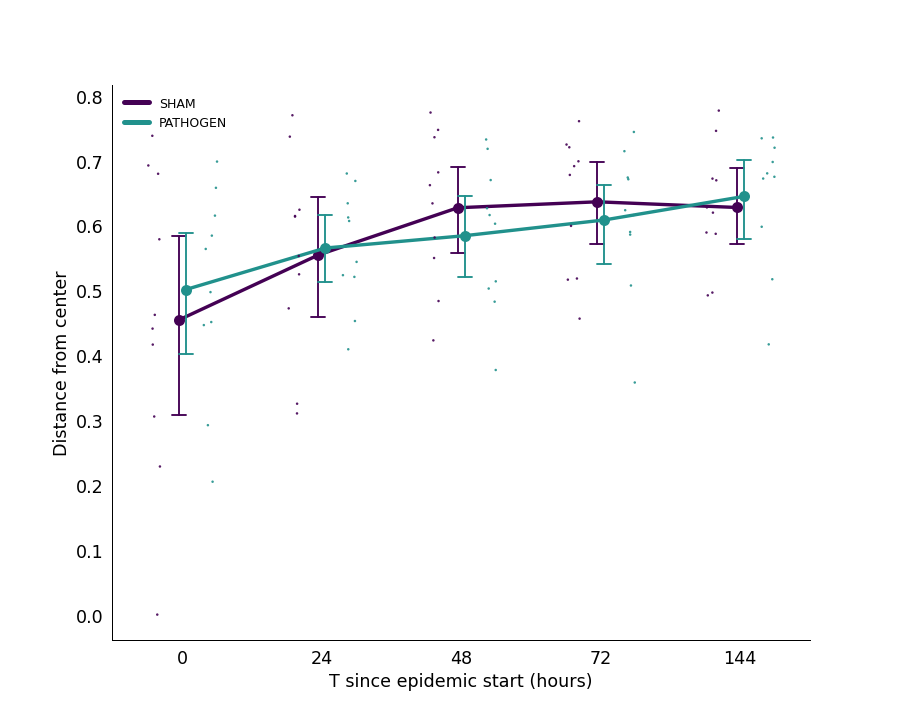

In [27]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(10,8))
sns.set_style("dark")
ax.set_facecolor(facecolor)
fig.patch.set_facecolor(facecolor)

if box:
    sns.boxplot(x='day', y=variable, hue='treatment', data=data_to_plot,
                ax=ax, width=0.3, linewidth=1.5,order=['TUE', 'WED', 'THU', 'FRI', 'MON'], palette=palette)
if strip:
    sns.stripplot(x='day', y=variable, hue='treatment', data=data_to_plot,
                  ax=ax, jitter=True, dodge=True, size=2, alpha=alpha, order=['TUE', 'WED', 'THU', 'FRI', 'MON'], palette=palette)
if strip_col:
    sns.stripplot(x='day', y=variable, hue='colony', data=data_to_plot,
                  ax=ax, jitter=True, dodge=True, size=pointsize, alpha=alpha, order=['TUE', 'WED', 'THU', 'FRI', 'MON'])
if mean:
    sns.pointplot(x='day', y=variable, hue='treatment', data=data_to_plot,
              ax=ax, dodge=True, capsize=.1, errwidth=1.5, join=True,
              order=['TUE', 'WED', 'THU', 'FRI', 'MON'],palette=palette)

if logscale==True:
    ax.set_yscale('log')
#ax.set_xlabel('treatment')
# Set label color to white
ax.set_ylabel(ylab, color=textcolor, fontsize=fontsize)
ax.tick_params(axis='y', colors=textcolor)
ax.set_xlabel('T since epidemic start (hours)', color=textcolor, fontsize=fontsize)
ax.set_xticklabels(['0', '24', '48', '72', '144'], fontsize=fontsize) 
ax.tick_params(axis='x', colors=textcolor)
ax.tick_params(axis='y', labelsize=fontsize)
ymin, ymax=plt.ylim()
# y = [2, 4, 6, 8, 10,12,14,16,18]
# ax.yaxis.set_ticks(range(0, max(y)+1, 2))
#ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
#ax.axhspan(ymin, ymax, xmin=0, xmax=0.2, hatch='/', facecolor='none', edgecolor='white')
handles, labels = ax.get_legend_handles_labels()
unique_labels = list([labels[0], labels[1]])
line_objects = []

for label in range(0,len(unique_labels)):
    line_objects.append(Line2D([0], [0], color=palette[label], lw=4, \
                               label=unique_labels[label]))

# Create the legend with the list of Line2D objects
legend = ax.legend(handles=line_objects, loc='upper left', frameon=False, facecolor=facecolor,\
                   edgecolor=textcolor)

for text in legend.get_texts():
    text.set_color(textcolor)


for text in legend.get_texts():
    text.set_color(textcolor)

ax.spines['bottom'].set_color(textcolor)
ax.spines['left'].set_color(textcolor)

sns.despine()

plt.show()

In [1136]:
plt.savefig('/home/ll16598/Documents/Obsidian Vault/GAUDI (Growth of Architecture Under Disease Influence)/Analysis/Key result graphs/' + filename +'.png')

In [961]:

box=False
strip=False
strip_col=True
mean=True
logscale=False
variable='nech_all_sptl_paths_list'
ylab='Chamber nodes previously in network'
#'Volume ($\mathrm{mm}^3$)'
data_to_plot=nech_all_sptl_paths_list
filename= 'white_weds_'+variable
#
viridis_map = cm.get_cmap('viridis')
# Get a list of 10 colors from the Viridis color map
num_colors = 3
viridis_colors = viridis_map(np.linspace(0, 1, num_colors))
# Print the list of colors
print(viridis_colors)
palette=list([viridis_colors[0], viridis_colors[1]])
palette=list([viridis_colors[1], viridis_colors[0]])
#palette=['cyan', 'orange']
#palette=['orange', 'cyan']
fontsize=14
alpha=0.9 #0.7 #0.1 for sim
pointsize=10
facecolor='white'
textcolor='black'

[[0.267004 0.004874 0.329415 1.      ]
 [0.127568 0.566949 0.550556 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


/tmp/ipykernel_634587/2281590046.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_map = cm.get_cmap('viridis')


<IPython.core.display.Javascript object>


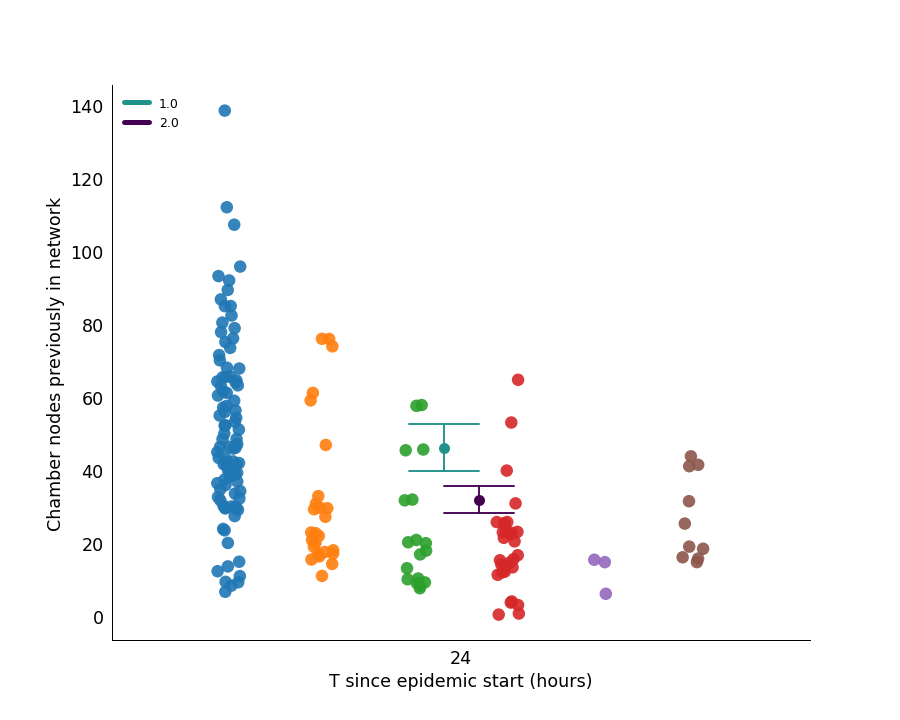

In [962]:
from matplotlib.lines import Line2D

# Filter the data for when day == TUE
data_tue = data_to_plot[data_to_plot['day'] == 'WED']

fig, ax = plt.subplots(figsize=(10,8))
sns.set_style("dark")
ax.set_facecolor(facecolor)
fig.patch.set_facecolor(facecolor)

if box:
    sns.boxplot(x='day', y=variable, hue='treatment', data=data_tue,
                ax=ax, width=0.3, linewidth=1.5, order=['TUE'], palette=palette)
if strip:
    sns.stripplot(x='day', y=variable, hue='treatment', data=data_tue,
                  ax=ax, jitter=True, dodge=True, size=2, alpha=alpha, order=['WED'], palette=palette)
if strip_col:
    sns.stripplot(x='day', y=variable, hue='colony', data=data_tue,
                  ax=ax, jitter=True, dodge=True, size=pointsize, alpha=alpha, order=['WED'])
if mean:
    sns.pointplot(x='day', y=variable, hue='treatment', data=data_tue,
              ax=ax, dodge=True, capsize=.1, errwidth=1.5, join=True,
              order=['WED'], palette=palette)

if logscale==True:
    ax.set_yscale('log')
#ax.set_xlabel('treatment')
# Set label color to white
ax.set_ylabel(ylab, color=textcolor, fontsize=fontsize)
ax.tick_params(axis='y', colors=textcolor)
ax.set_xlabel('T since epidemic start (hours)', color=textcolor, fontsize=fontsize)
ax.set_xticklabels(['24'], fontsize=fontsize) 
ax.tick_params(axis='x', colors=textcolor)
ax.tick_params(axis='y', labelsize=fontsize)
ymin, ymax=plt.ylim()
# y = [2, 4, 6, 8, 10,12,14,16,18]
# ax.yaxis.set_ticks(range(0, max(y)+1, 2))
#ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
#ax.axhspan(ymin, ymax, xmin=0, xmax=0.2, hatch='/', facecolor='none', edgecolor='white')
handles, labels = ax.get_legend_handles_labels()
unique_labels = list([labels[0], labels[1]])
line_objects = []

for label in range(0,len(unique_labels)):
    line_objects.append(Line2D([0], [0], color=palette[label], lw=4, \
                               label=unique_labels[label]))

# Create the legend with the list of Line2D objects
legend = ax.legend(handles=line_objects, loc='upper left', frameon=False, facecolor=facecolor,\
                   edgecolor=textcolor)

for text in legend.get_texts():
    text.set_color(textcolor)


for text in legend.get_texts():
    text.set_color(textcolor)

ax.spines['bottom'].set_color(textcolor)
ax.spines['left'].set_color(textcolor)

sns.despine()

plt.show()


In [588]:
plt.savefig('/home/ll16598/Documents/Obsidian Vault/GAUDI (Growth of Architecture Under Disease Influence)/Analysis/Key result graphs/' + filename +'.png')

In [740]:
dfs = []
df=df_G_width
for i, x in enumerate(df['all_min_comm_bet']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'all_min_comm_bet': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           #'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
all_min_comm_bet = result.reset_index(drop=True)


dfs = []
df=df_G_width
for i, x in enumerate(df['all_max_comm_bet']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'all_max_comm_bet': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           #'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
all_max_comm_bet = result.reset_index(drop=True)
#result.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/PATH_LENGTH_ANALYSIS/CH_CH_CHAMBERS_TRAVERSED.csv', index=False)
dfs = []
df=df_G_width
for i, x in enumerate(df['all_proportion_edgeWcham']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'all_proportion_edgeWcham': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           #'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
all_proportion_edgeWcham = result.reset_index(drop=True)

dfs = []
df=df_G_width
for i, x in enumerate(df['all_proportion_connecting_edgeWcham']):
    #print(x)
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'all_proportion_connecting_edgeWcham': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           'name': [df['name'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           #'time': [df['time'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result= pd.concat(dfs)
all_proportion_connecting_edgeWcham = result.reset_index(drop=True)

<IPython.core.display.Javascript object>


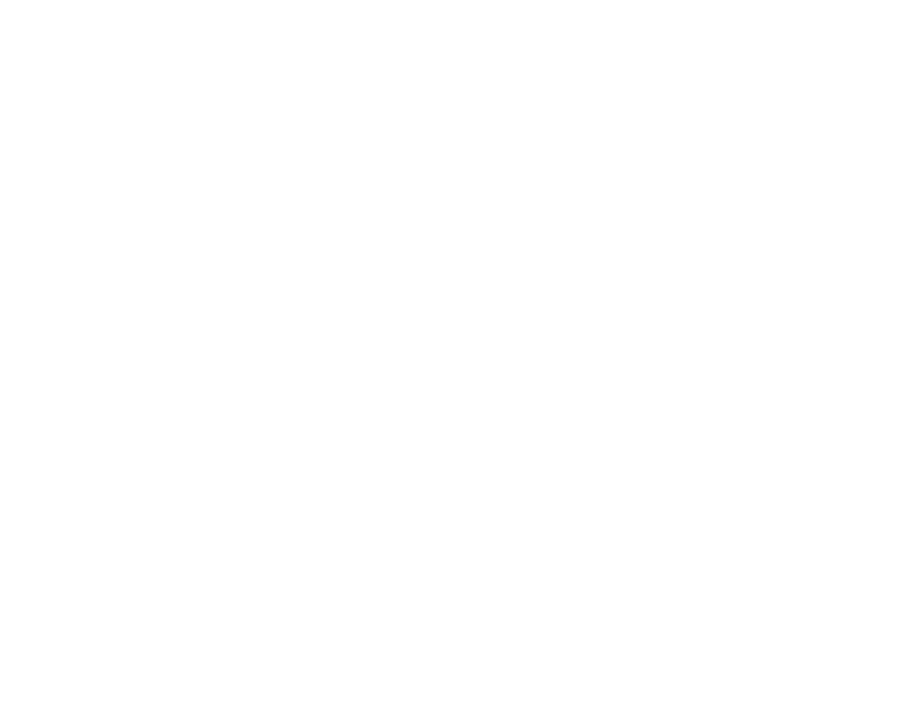

/home/ll16598/miniconda3/envs/SICC_AUG_22/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/home/ll16598/miniconda3/envs/SICC_AUG_22/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


In [369]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(10,8))
sns.set_style("dark")
ax.set_facecolor("black")
fig.patch.set_facecolor('black')

if box:
    sns.boxplot(x='day', y=variable, hue='treatment', data=data_to_plot,
                ax=ax, width=0.3, linewidth=1.5,order=['TUE', 'WED', 'THU', 'FRI', 'MON'], palette=palette)
if strip:
    sns.stripplot(x='day', y=variable, hue='treatment', data=data_to_plot,
                  ax=ax, jitter=True, dodge=True, size=2, alpha=alpha, order=['TUE', 'WED', 'THU', 'FRI', 'MON'])
if mean:
    sns.pointplot(x='day', y=variable, hue='treatment', data=data_to_plot,
              ax=ax, dodge=True, capsize=.1, errwidth=1.5, join=True,
              order=['TUE', 'WED', 'THU', 'FRI', 'MON'],palette=palette)

if logscale==True:
    ax.set_yscale('log')
#ax.set_xlabel('treatment')
# Set label color to white
ax.set_ylabel(ylab, color="white", fontsize=fontsize)
ax.tick_params(axis='y', colors='white')
ax.set_xlabel('T since epidemic start (hours)', color="white", fontsize=fontsize)
ax.set_xticklabels(['0', '24', '48', '72', '144'], fontsize=fontsize) 
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', labelsize=fontsize)
ymin, ymax=plt.ylim()
# y = [2, 4, 6, 8, 10,12,14,16,18]
# ax.yaxis.set_ticks(range(0, max(y)+1, 2))
#ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
#ax.axhspan(ymin, ymax, xmin=0, xmax=0.2, hatch='/', facecolor='none', edgecolor='white')
handles, labels = ax.get_legend_handles_labels()
unique_labels = list([labels[0], labels[1]])
line_objects = []

for label in range(0,len(unique_labels)):
    line_objects.append(Line2D([0], [0], color=palette[label], lw=4, label=unique_labels[label]))

# Create the legend with the list of Line2D objects
legend = ax.legend(handles=line_objects, loc='upper left', frameon=True, facecolor='black', edgecolor='white')

for text in legend.get_texts():
    text.set_color("white")


for text in legend.get_texts():
    text.set_color("white")



sns.despine()

plt.show()

Basic nest property analysis


In [ ]:
abm_df.head

In [ ]:
abm_df['t']

In [ ]:
abm_df=pd.read_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/GAUDI_ABM.csv')
vid_df=pd.read_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/VIDEO_RESULTS.csv')

In [ ]:
vid_df = vid_df[vid_df['marked_exits'] != 'na']
vid_df['marked_exits'] = vid_df['marked_exits'].replace('[^0-9]+', 0, regex=True)
vid_df['marked_exits'] = pd.to_numeric(vid_df['marked_exits'])
vid_df = vid_df[vid_df['unmarked_exits'] != 'na']
vid_df['unmarked_exits'] = vid_df['unmarked_exits'].replace('[^0-9]+', 0, regex=True)
vid_df['unmarked_exits'] = pd.to_numeric(vid_df['unmarked_exits'])
# vid_df.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/VIDEO_RESULTS_TIDY.csv', index=False)


In [ ]:
vid_df

In [ ]:

abm_df['sum_all_cham_spores'] = [sum(ast.literal_eval(lst)) if len(lst) > 0 else 0 for lst in abm_df['all_cham_spores']]

In [ ]:

t_value = 50

# calculate the mean of the sum_all_cham_spores column for the rows where treatment is 'pathogen' and t is equal to t_value
mean_spores = abm_df.loc[(abm_df['t'] == t_value) & (abm_df['treatment'] == 'PATHOGEN'), 'all_cham_spores'].mean()
mean_spores_sh = abm_df.loc[(abm_df['t'] == t_value) & (abm_df['treatment'] == 'SHAM'), 'all_cham_spores'].mean()

# print the mean
print(mean_spores, mean_spores_sh)

In [ ]:
abm_df['treatment']=abm_df['condition']
abm_df['t']=abm_df['all_times']
n_rows_to_plot = 5000  # Change this to plot a different number of rows
#abm = abm_df.iloc[:n_rows_to_plot]  
data_to_plot = vid_df #abm_df.query('t % 10 == 0')
strip=True
logscale=False
variable='marked_exits'
ylab=variable
#'Volume ($\mathrm{mm}^3$)'
mean=True
filename=variable
#palette=['cyan', 'orange']
palette=['orange', 'cyan']
fontsize=14
alpha=1 #0.7 #0.1 for sim

In [ ]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(10,8))
sns.set_style("dark")
ax.set_facecolor("black")
fig.patch.set_facecolor('black')


if strip:
    sns.stripplot(x='t', y=variable, hue='treatment', data=data_to_plot,
                  ax=ax, jitter=True, dodge=True, size=0.1, alpha=alpha,palette=palette)
if mean:
    sns.pointplot(x='t', y=variable, hue='treatment', data=data_to_plot,
              ax=ax, dodge=True, ci=None, join=True,palette=palette)

if logscale==True:
    ax.set_yscale('log')
#ax.set_xlabel('treatment')
# Set label color to white
ax.set_ylabel(ylab, color="white", fontsize=fontsize)
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', labelsize=fontsize)
#ymin, ymax=plt.ylim()
#xmin, xmax=0, 500
# y = [2, 4, 6, 8, 10,12,14,16,18]
#ax.xaxis.set_ticks(range(0, 100), 100)
#ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
#ax.axhspan(ymin, ymax, xmin=xmin, xmax=xmax, hatch='/', facecolor='none', edgecolor='white')
handles, labels = ax.get_legend_handles_labels()
unique_labels = list([labels[0], labels[1]])
line_objects = []

for label in range(0,len(unique_labels)):
    line_objects.append(Line2D([0], [0], color=palette[label], lw=4, label=unique_labels[label]))

# Create the legend with the list of Line2D objects
legend = ax.legend(handles=line_objects, loc='upper left', frameon=True, facecolor='black', edgecolor='white')

for text in legend.get_texts():
    text.set_color("white")


for text in legend.get_texts():
    text.set_color("white")

#plt.xlim(xmin, xmax)

sns.despine()

plt.show()

In [ ]:
df_basic = pd.read_csv (r'/media/ll16598/One Touch/CT_ANALYSIS/FINAL/ALL_ANALYSIS.csv')
df=df_basic

In [143]:
df1['chambers']=pd.to_numeric(df1['chambers'])

In [ ]:
try:
    df['chamber_depth_list'] = df['chamber_depth_list'].apply(split_and_convert)
except TypeError:
    pass

In [2]:
df=df_G_width
dfs = []
for i, x in enumerate(df['all_depths_new']):
    new_df = pd.DataFrame({'all_depths_new': x,
                           'treatment': [df['treatment'][i]] * len(x),
                          # 'name': [df['name'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)
                          })
    dfs.append(new_df)
result_cham_depth = pd.concat(dfs)
chamber_depth_list = result_cham_depth.reset_index(drop=True)
result_cham_depth.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/PHYSICAL_ANALYSIS/CH_DEPTH.csv', index=False)


NameError: name 'df_G_width' is not defined

In [ ]:
#result_cham_depth.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/PHYSICAL_ANALYSIS/CH_DEPTH.csv', index=False)


In [ ]:
dfs = []
for i, x in enumerate(df['cham_vol_list']):
    try:
        x=ast.literal_eval(x)
    except ValueError:
        continue
    new_df = pd.DataFrame({'cham_vol_list': x,
                           'treatment': [df['treatment'][i]] * len(x),
                           #'name': [df['name'][i]] * len(x),
                           'day': [df['day'][i]] * len(x),
                           'week': [df['week'][i]] * len(x),
                           'subset': [df['subset'][i]] * len(x),
                           'order': [df['order'][i]] * len(x),
                           'colony': [df['colony'][i]] * len(x)})
    dfs.append(new_df)
result_cham_vol = pd.concat(dfs)
cham_vol_list = result_cham_vol.reset_index(drop=True)

In [ ]:
result_cham_vol.to_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/PHYSICAL_ANALYSIS/CH_VOL.csv', index=False)


In [147]:
df1['chambers']

0     1
1     1
2     1
3     2
4     1
     ..
95    0
96    3
97    3
98    4
99    4
Name: chambers, Length: 100, dtype: int64

In [144]:
box=False
strip=True
mean=True
logscale=False
variable='chambers'
ylab=variable
data_to_plot=df1
palette=['cyan', 'orange']
fontsize=14

<IPython.core.display.Javascript object>


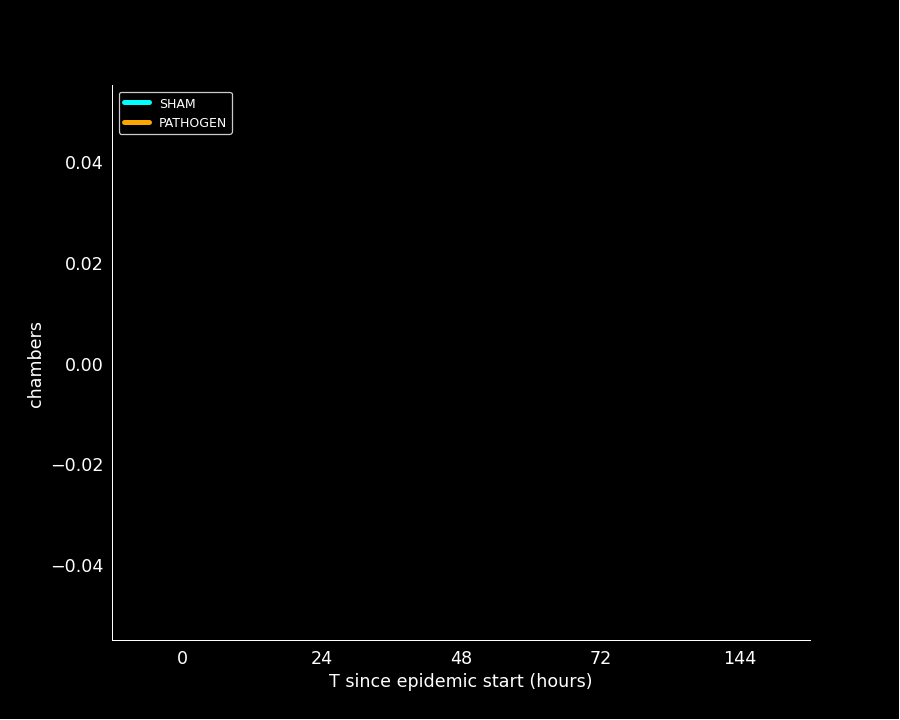

/home/ll16598/miniconda3/envs/SICC_AUG_22/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


In [145]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(10,8))
sns.set_style("dark")
ax.set_facecolor("black")
fig.patch.set_facecolor('black')

if box:
    sns.boxplot(x='day', y=variable, hue='treatment', data=data_to_plot,
                ax=ax, width=0.3, linewidth=1.5,order=['TUE', 'WED', 'THU', 'FRI', 'MON'], palette=palette)
if strip:
    sns.stripplot(x='day', y=variable, hue='treatment', data=data_to_plot,
                  ax=ax, jitter=True, dodge=True, size=2, order=['TUE', 'WED', 'THU', 'FRI', 'MON'], palette=palette)
if mean:
    sns.pointplot(x='day', y=variable, hue='treatment', data=data_to_plot,
              ax=ax, dodge=True, capsize=.1, errwidth=1.5, join=True,
              order=['TUE', 'WED', 'THU', 'FRI', 'MON'],palette=palette)

if logscale:
    ax.set_yscale('log')
#ax.set_xlabel('treatment')
# Set label color to white
ax.set_ylabel(ylab, color="white", fontsize=fontsize)
ax.tick_params(axis='y', colors='white')
ax.set_xlabel('T since epidemic start (hours)', color="white", fontsize=fontsize)
ax.set_xticklabels(['0', '24', '48', '72', '144'], fontsize=fontsize) 
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', labelsize=fontsize)
ymin, ymax=plt.ylim()
#ax.axhspan(ymin, ymax, xmin=0, xmax=0.2, hatch='/', facecolor='none', edgecolor='white')
handles, labels = ax.get_legend_handles_labels()
unique_labels = list([labels[0], labels[1]])
line_objects = []

for label in range(0,len(unique_labels)):
    line_objects.append(Line2D([0], [0], color=palette[label], lw=4, label=unique_labels[label]))

# Create the legend with the list of Line2D objects
legend = ax.legend(handles=line_objects, loc='upper left', frameon=True, facecolor='black', edgecolor='white')

for text in legend.get_texts():
    text.set_color("white")


for text in legend.get_texts():
    text.set_color("white")



sns.despine()

plt.show()

In [ ]:
filename=variable

In [ ]:
plt.savefig('/home/ll16598/Documents/Obsidian Vault/GAUDI (Growth of Architecture Under Disease Influence)/Analysis/Key result graphs/' + filename +'.png')

Path length analsis below. Saved are only the key results. Should be careful as can often differ on tuesday as well as for other days.